In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

/Users/hilinasisay/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Upload dataset
newyork_airbnb = pd.read_csv('AB_NYC_2019.csv.zip')
newyork_airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Clean the Data

In [3]:
newyork_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
newyork_airbnb['last_review'] = pd.to_datetime(newyork_airbnb['last_review'])

In [5]:
newyork_airbnb['neighbourhood'] = newyork_airbnb['neighbourhood'].astype('category')
newyork_airbnb['room_type'] = newyork_airbnb['room_type'].astype('category')

In [6]:
newyork_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  category      
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [7]:
print(newyork_airbnb.dtypes)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [8]:
newyork_airbnb.duplicated().sum() #check for duplicates

0

In [9]:
newyork_airbnb.isnull().sum() #check for any null values

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
newyork_airbnb.drop(['id'], axis=1, inplace=True)

In [11]:
newyork_airbnb.fillna({'host_name': 'N/A'}, inplace=True)

In [12]:
newyork_airbnb.fillna({'name': 'N/A'}, inplace=True)

In [13]:
newyork_airbnb.fillna({'reviews_per_month': 0}, inplace=True)

In [14]:
print(newyork_airbnb.columns)

Index(['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [15]:
newyork_airbnb.isnull().sum() #check for null values one more time

name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## What can we learn about different hosts and areas?

### Top 10 Most Active Hosts

In [16]:
grouped_data = newyork_airbnb.groupby('host_id')
num_listings = grouped_data.size().reset_index(name='num_listings')
sorted_hosts = num_listings.sort_values('num_listings', ascending=False) #in descending order
top_hosts = sorted_hosts.head(15)
top_hosts.head(10)

,host_id,num_listings
34646,219517861,327
29407,107434423,232
19574,30283594,121
31079,137358866,103
14436,16098958,96
12806,12243051,96
25662,61391963,91
17091,22541573,87
33868,200380610,65
3044,1475015,52


In [17]:
#Get the host names
host_names = newyork_airbnb[['host_id', 'host_name']].drop_duplicates('host_id')
#Merge with the top hosts Data to get the host names
top_hosts_info = pd.merge(top_hosts, host_names, on='host_id')
#top hosts with their names
top_hosts_info[['host_name', 'num_listings']].head(10)

,host_name,num_listings
0,Sonder (NYC),327
1,Blueground,232
2,Kara,121
3,Kazuya,103
4,Jeremy & Laura,96
5,Sonder,96
6,Corporate Housing,91
7,Ken,87
8,Pranjal,65
9,Mike,52


### Hosts Who Charge The Highest and Lowest Prices on Average

In [18]:
#Group the data by the 'host_id' column and calculate the mean of the 'price' column
host_avg_price = newyork_airbnb.groupby('host_id')['price'].mean().reset_index()
#Merge the host_avg_price DataFrame with the newyork_airbnb DataFrame on the 'host_id' column
top10_host_avg_price = host_avg_price.sort_values('price', ascending=False).head(10)
top10_hosts = pd.merge(top10_host_avg_price, newyork_airbnb[['host_id', 'host_name', 'neighbourhood_group']], on='host_id')
#Top 10 hosts with the highest average price and their names
print(top10_hosts[['host_id', 'host_name', 'neighbourhood_group', 'price']]) 

    host_id host_name neighbourhood_group    price
0  72390391    Jelena           Manhattan  10000.0
1  20582832  Kathrine              Queens  10000.0
2   5143901      Erin            Brooklyn  10000.0
3   4382127      Matt           Manhattan   9999.0
4   3906464       Amy           Manhattan   9999.0
5   1235070     Olson           Manhattan   9999.0
6  18128455       Rum           Manhattan   8500.0
7   7407743      Jack           Manhattan   7500.0
8  35303743  Patricia           Manhattan   6500.0
9  11598359  Jonathan            Brooklyn   6500.0


### Distribution of Host Listings by Neighborhood

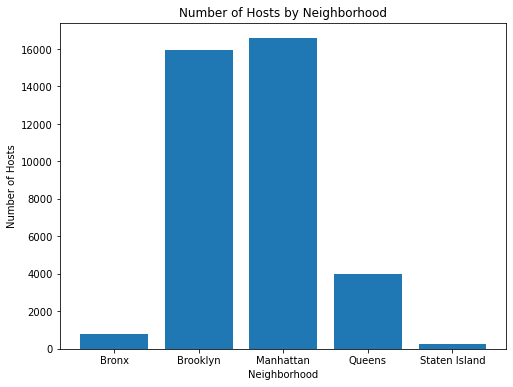

In [19]:
# Group the data by the 'neighbourhood_group' and 'host_id' columns and count the number of listings for each neighborhood and host
listings_by_neighborhood = newyork_airbnb.groupby(['neighbourhood_group', 'host_id']).size().reset_index(name='num_listings')

# Group the data by the 'neighbourhood_group' column and count the number of hosts for each neighborhood
hosts_by_neighborhood = listings_by_neighborhood.groupby('neighbourhood_group')['host_id'].nunique().reset_index(name='num_hosts')

# Create a bar chart showing the number of hosts per neighborhood
plt.figure(figsize=(8,6))
plt.bar(hosts_by_neighborhood['neighbourhood_group'], hosts_by_neighborhood['num_hosts'])
plt.title('Number of Hosts by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Hosts')
plt.show()


In [20]:
# Calculate the average price by neighborhood
avg_price_by_neighborhood = newyork_airbnb.groupby('neighbourhood_group')['price'].mean().reset_index(name='avg_price')

# Sort the results in descending order by average price
sorted_neighborhoods = avg_price_by_neighborhood.sort_values('avg_price', ascending=False)

# Print the top 5 neighborhoods by average price
print(sorted_neighborhoods.head(10))

  neighbourhood_group   avg_price
2           Manhattan  196.875814
1            Brooklyn  124.383207
4       Staten Island  114.812332
3              Queens   99.517649
0               Bronx   87.496792


In [21]:
# Group the data by room type
room_type_counts = newyork_airbnb.groupby('room_type').size().reset_index(name='count')

# Sort the data by count in descending order
sorted_counts = room_type_counts.sort_values('count', ascending=False)

# top 5 most common room types
sorted_counts.head()

         room_type  count
0  Entire home/apt  25409
1     Private room  22326
2      Shared room   1160


### Most common types of listings in each neighborhood

In [22]:
listings_by_neighborhood_roomtype = newyork_airbnb.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')
print(listings_by_neighborhood_roomtype)

#This is a dataframe where each row represents a combination of neighborhood group and room type, and 
#the count column shows the number of listings in that group.

   neighbourhood_group        room_type  count
0                Bronx  Entire home/apt    379
1                Bronx     Private room    652
2                Bronx      Shared room     60
3             Brooklyn  Entire home/apt   9559
4             Brooklyn     Private room  10132
5             Brooklyn      Shared room    413
6            Manhattan  Entire home/apt  13199
7            Manhattan     Private room   7982
8            Manhattan      Shared room    480
9               Queens  Entire home/apt   2096
10              Queens     Private room   3372
11              Queens      Shared room    198
12       Staten Island  Entire home/apt    176
13       Staten Island     Private room    188
14       Staten Island      Shared room      9


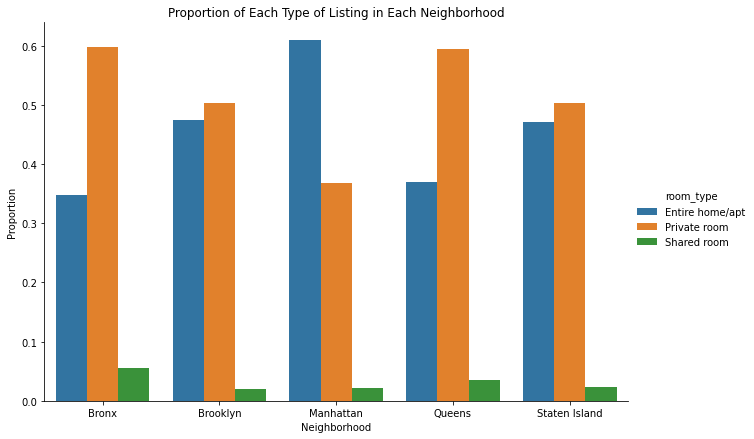

In [23]:
# group the data by neighborhood and room type, then count the number of listings in each group
grouped_data = newyork_airbnb.groupby(['neighbourhood_group', 'room_type']).size().reset_index(name='count')

# calculate the total number of listings in each neighborhood
total_listings = grouped_data.groupby('neighbourhood_group').sum().reset_index()

# calculate the proportion of each type of listing in each neighborhood
grouped_data['proportion'] = grouped_data['count'] / grouped_data.merge(total_listings, on='neighbourhood_group')['count_y']

# create a grouped bar chart

sns.catplot(x='neighbourhood_group', y='proportion', hue='room_type', data=grouped_data, kind='bar', height=6, aspect=1.5)
plt.title('Proportion of Each Type of Listing in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Proportion')
plt.show()

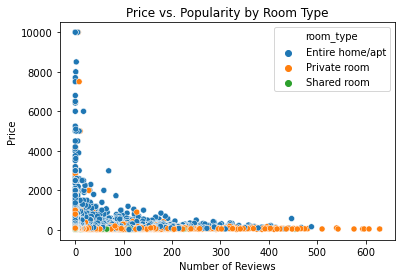

In [24]:
# create a scatter plot of price vs. number of reviews, color-coded by room type
sns.scatterplot(data=newyork_airbnb, x='number_of_reviews', y='price', hue='room_type')

# add labels and title
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Price vs. Popularity by Room Type')

# show the plot
plt.show()



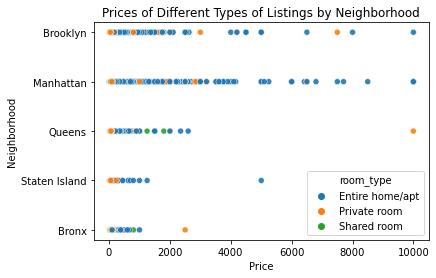

In [25]:

sns.scatterplot(x='price', y='neighbourhood_group', hue='room_type', data=newyork_airbnb, alpha=0.9)
plt.title('Prices of Different Types of Listings by Neighborhood')
plt.xlabel('Price')
plt.ylabel('Neighborhood')
plt.show()

In [32]:
# create a new column 'month' by extracting the month from the 'last_review' column
newyork_airbnb['month'] = newyork_airbnb['last_review'].dt.month

# group the data by 'month' and calculate the average availability for each month using the 'availability_365' column
availability_by_month = newyork_airbnb.groupby('month')['availability_365'].mean()

availability_by_month.head(12)

month
1.0      63.479986
2.0      82.189610
3.0      90.302795
4.0      97.717402
5.0     130.922782
6.0     147.325999
7.0     130.139633
8.0      52.067187
9.0      67.723127
10.0     85.016818
11.0     61.050950
12.0     66.485876
Name: availability_365, dtype: float64

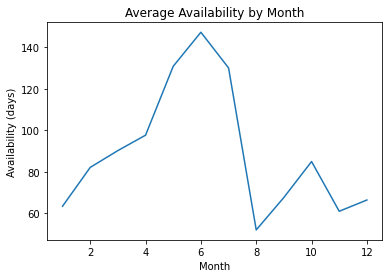

In [35]:

plt.plot(availability_by_month.index, availability_by_month.values)
plt.title('Average Availability by Month')
plt.xlabel('Month')
plt.ylabel('Availability (days)')
plt.show()

In [33]:
# create a new column 'weekday' by extracting the weekday from the 'last_review' column
newyork_airbnb['weekday'] = newyork_airbnb['last_review'].dt.weekday

# group the data by 'weekday' and calculate the average availability for each weekday using the 'availability_365' column
availability_by_weekday = newyork_airbnb.groupby('weekday')['availability_365'].mean()

availability_by_weekday.head(7)

weekday
0.0    108.461474
1.0    106.606035
2.0    109.569462
3.0    115.596511
4.0    122.097408
5.0    122.150906
6.0    118.249947
Name: availability_365, dtype: float64

Text(0, 0.5, 'Availability (days)')

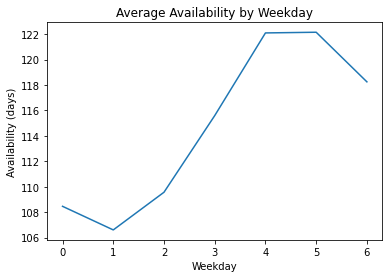

In [36]:
# create a line plot of the average availability by weekday
plt.plot(availability_by_weekday.index, availability_by_weekday.values)

# set the title and axis labels
plt.title('Average Availability by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Availability (days)')


Text(0, 0.5, 'Availability (days)')

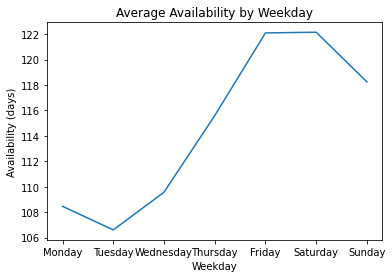

In [37]:
# create a list of weekday names
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# create a line plot of the average availability by weekday
plt.plot(availability_by_weekday.index, availability_by_weekday.values)

# set the x-axis tick labels to the weekday names
plt.xticks(availability_by_weekday.index, weekday_names)

# set the title and axis labels
plt.title('Average Availability by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Availability (days)')